# Name-Subham Kedia
# UNI-sk4355
# Assignment-5

<h1>Data Analysis and Visualization Home Assignment</h1>
<li>I've tried to outline the steps for you so please make use of the cells
<li>If you run into data size issues, subset your data. But try to use as much as you can get away with
<li>Note that many of the steps will take a while to run, especially if your computer is not powerful enough. Be patient! 


<ol>
<li>Read the data from <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2016-01.csv">https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2016-01.csv</a>
<li>Remove any data that is outside the NYC bounding box
<ul>
<li>NYC bounding box: westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
<li>See http://boundingbox.klokantech.com for info on bounding boxes
</ul>
<li>Calculate taxi trip duration and save in a new column "duration"
<li>Convert duration into a float
<li>Do some basic analysis (see below)
<li>Add a day of week column
<li>Add an hour of day column
<li>Do some analysis (see below)
<li>Divide the data into zones
<ul>
<li>write a function createZoneTable(zone_factor) that divides the bounding box into zones
<li>the idea is to create zone_factor * zone_factor zones
<li>e.g., if zone_factor is 20, you'll create 20*20 = 400 zones
<li>Divide the longitude (-73.7526 to -74.2635) into zone_factor (e.g., 20) sections
<li>Divide the latitude (40.4856 to 40.9596) into zone_factor (e.g., 20) sections
<li>Return a table (a list of lists) containing a zone id, and the coordinates of the zone
<li>(see e.g., below)
</ul>
<li>Write a function get_zone(lat,lon) that figures out the zone given a latitude and longitude
<li>Apply this function to the dataframe, first with pickup lats and longs; then with dropoff lats and longs
<li>This will give two new "pickup_zone" and "dropoff_zone" columns
<li>Do some analysis (see below)
<li>Using folium, draw a heatmap of the number of trips originating in each zone
<ul>
<li>Create a geojson object for all the zones 
<li>Create a df that contains zone numbers and the number of trips originating in each zone
<li>Use folium to create a heatmap
<li><b>OPTIONAL:</b> You'll notice that the bounding box is much larger than New York City. Try to remove every zone that has 0 originating trips from your map. (Hint: You can remove them from the geojson object)


<h2>Read the data</h2>


In [9]:
#Add necessary imports and functions to read the data
import pandas as pd
import numpy as np
import folium
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import copy
import seaborn as sns
plt.style.use('seaborn')
from scipy import stats
import geojsonio
import json
import folium

In [3]:
df = pd.read_csv("yellow_tripdata_2016-01.csv")

In [4]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.00,0.00,0.3,8.80
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.00,0.00,0.3,19.30
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.00,0.00,0.3,34.30
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.00,0.00,0.3,17.30
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.00,0.00,0.3,8.80
5,2,2016-01-01 00:00:00,2016-01-01 00:18:30,2,5.52,-73.980118,40.743050,1,N,-73.913490,40.763142,2,19.0,0.5,0.5,0.00,0.00,0.3,20.30
6,2,2016-01-01 00:00:00,2016-01-01 00:26:45,2,7.45,-73.994057,40.719990,1,N,-73.966362,40.789871,2,26.0,0.5,0.5,0.00,0.00,0.3,27.30
7,1,2016-01-01 00:00:01,2016-01-01 00:11:55,1,1.20,-73.979424,40.744614,1,N,-73.992035,40.753944,2,9.0,0.5,0.5,0.00,0.00,0.3,10.30
8,1,2016-01-01 00:00:02,2016-01-01 00:11:14,1,6.00,-73.947151,40.791046,1,N,-73.920769,40.865578,2,18.0,0.5,0.5,0.00,0.00,0.3,19.30
9,2,2016-01-01 00:00:02,2016-01-01 00:11:08,1,3.21,-73.998344,40.723896,1,N,-73.995850,40.688400,2,11.5,0.5,0.5,0.00,0.00,0.3,12.80


<h2>Remove data outside the bounding box</h2>


In [5]:
westlimit = -74.2635
southlimit = 40.4856 
eastlimit = -73.7526
northlimit = 40.9596
#Remove the data that is not within the limits specified above
df = df[(df['pickup_longitude'] >= westlimit) & (df['pickup_longitude'] <= eastlimit)]
print(len(df))
df = df[(df['pickup_latitude'] >= southlimit) & (df['pickup_latitude'] <= northlimit)]
print(len(df))
df = df[(df['dropoff_longitude'] >= westlimit) & (df['dropoff_longitude'] <= eastlimit)]
print(len(df))
df = df[(df['dropoff_latitude'] >= southlimit) & (df['dropoff_latitude'] <= northlimit)]
print(len(df))

10734534
10733866
10705240
10704033


<h2>Add a column for taxi trip duration</h2>
<li>strptime formats: http://pubs.opengroup.org/onlinepubs/009695399/functions/strptime.html

In [6]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01,2016-01-01,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
1,2,2016-01-01,2016-01-01,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,2,2016-01-01,2016-01-01,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3
3,2,2016-01-01,2016-01-01,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3
4,2,2016-01-01,2016-01-01,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8


In [7]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'] 

<h2>Convert duration column into a float (number of seconds)</h2>
<li><span style="color:blue">timedelta64(1, 's')</span> represents one second

In [10]:
df['duration'] = df['duration'] / np.timedelta64(1, 's')
#df['duration'] = df['duration'].apply(lambda x: datetime.timedelta(days=x.days, seconds=x.seconds).total_seconds())
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,2,2016-01-01,2016-01-01,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8,0.0
1,2,2016-01-01,2016-01-01,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3,0.0
2,2,2016-01-01,2016-01-01,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3,0.0
3,2,2016-01-01,2016-01-01,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3,0.0
4,2,2016-01-01,2016-01-01,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8,0.0


<h2>Remove data where duration is greater than 10000 seconds</h2>

In [11]:
df = df[df['duration'] <= 10000]

<h2>Plot duration and compare with a gamma distribution</h2>

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

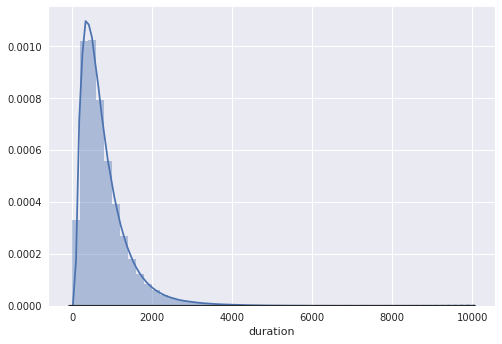

In [13]:
sns.distplot(df['duration'], kde=True, fit=stats.gamma)

<h2>Plot the scatter plot between trip_distance and duration</h2>

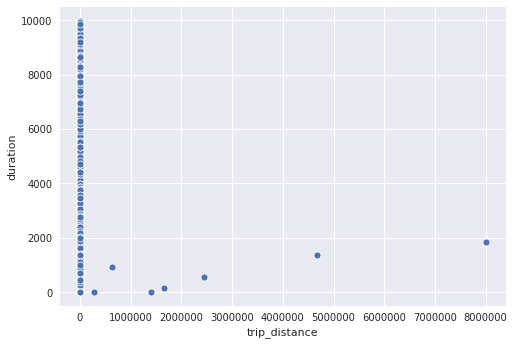

In [14]:
sns.scatterplot(x = df['trip_distance'], y = df['duration'])

<h2>Create a column "day_of_week" that puts in an integer for the weekday</h2>
<li>Monday = 1, Sunday = 7
<li>Investigate here! https://docs.python.org/3/library/datetime.html
<li>Use tpep_pickup_datetime to get the weekday

In [15]:
df['day_of_week'] = df['tpep_pickup_datetime'].apply(lambda x: x.isoweekday())

<h2>Create time of day buckets using the hour part of tpep_pickup_datetime</h2>

In [22]:
df['pickup_hour'] = df['tpep_pickup_datetime'].apply(lambda x: x.hour)

<h2>Plot a bar graph that groups the data by day of week and then by time of day</h2>
<li>Do you notice any differences?</li>

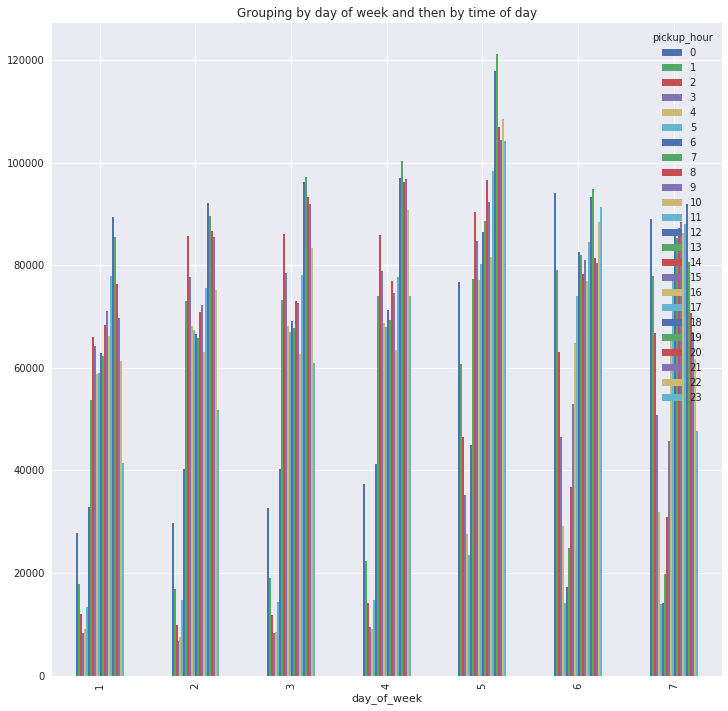

In [23]:
group1 = df.groupby(['day_of_week','pickup_hour'])
group1.size().unstack().plot(kind='bar',title="Grouping by day of week and then by time of day",figsize=(12,12))

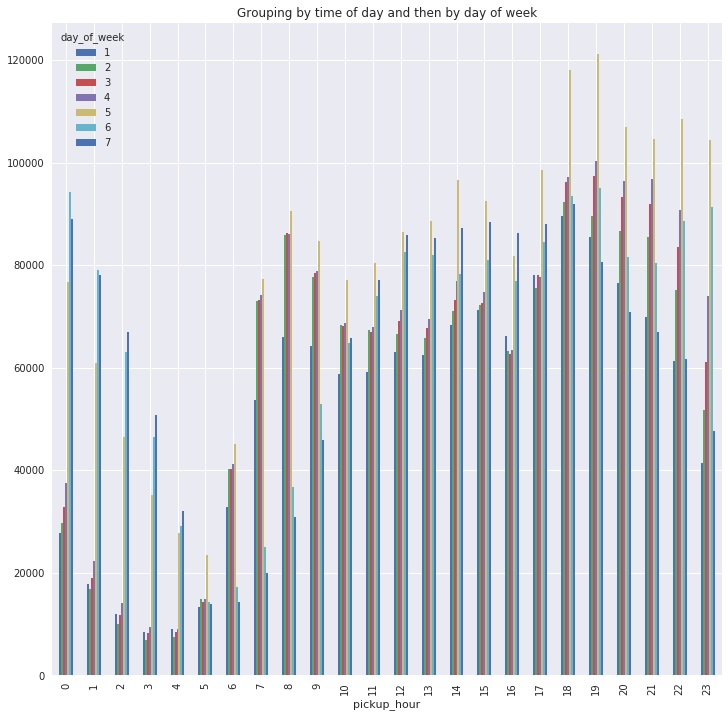

In [24]:
group2 = df.groupby(['pickup_hour','day_of_week'])
group2.size().unstack().plot(kind='bar',title="Grouping by time of day and then by day of week",figsize=(12,12))

<h2>Create zones</h2>

In [25]:
def createZoneTable(zone_factor,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596):
    zone_table = list()
    long_sections = (eastlimit - westlimit) / zone_factor
    lat_sections = (northlimit - southlimit) / zone_factor
    a = 0
    for i in range(0, zone_factor):
        for j in range(0, zone_factor):
            temp_tuple = ()
            first = [(southlimit + (i)*lat_sections), (westlimit + (j)*long_sections)]
            second = [(southlimit + (i)*lat_sections), (westlimit + (j+1)*long_sections)]
            third = [(southlimit + (i+1)*lat_sections), (westlimit + (j+1)*long_sections)]
            fourth = [(southlimit + (i+1)*lat_sections), (westlimit + (j)*long_sections)]
            fifth = [(southlimit + (i)*lat_sections), (westlimit + (j)*long_sections)]
            if (a<10):
                k = str(0) + str(a)
            else:
                k = str(a)
            a = a + 1
            temp_tuple = (k, [first, second, third, fourth, fifth])
            zone_table.append(temp_tuple)
    return zone_table

In [26]:
createZoneTable(10)

[('00',
  [[40.4856, -74.2635],
   [40.4856, -74.21240999999999],
   [40.533, -74.21240999999999],
   [40.533, -74.2635],
   [40.4856, -74.2635]]),
 ('01',
  [[40.4856, -74.21240999999999],
   [40.4856, -74.16131999999999],
   [40.533, -74.16131999999999],
   [40.533, -74.21240999999999],
   [40.4856, -74.21240999999999]]),
 ('02',
  [[40.4856, -74.16131999999999],
   [40.4856, -74.11023],
   [40.533, -74.11023],
   [40.533, -74.16131999999999],
   [40.4856, -74.16131999999999]]),
 ('03',
  [[40.4856, -74.11023],
   [40.4856, -74.05914],
   [40.533, -74.05914],
   [40.533, -74.11023],
   [40.4856, -74.11023]]),
 ('04',
  [[40.4856, -74.05914],
   [40.4856, -74.00805],
   [40.533, -74.00805],
   [40.533, -74.05914],
   [40.4856, -74.05914]]),
 ('05',
  [[40.4856, -74.00805],
   [40.4856, -73.95696],
   [40.533, -73.95696],
   [40.533, -74.00805],
   [40.4856, -74.00805]]),
 ('06',
  [[40.4856, -73.95696],
   [40.4856, -73.90587],
   [40.533, -73.90587],
   [40.533, -73.95696],
   [40.48

Example of a zone table

[('00',
  [[40.4856, -74.2635],
   [40.4856, -74.21240999999999],
   [40.533, -74.21240999999999],
   [40.533, -74.2635],
   [40.4856, -74.2635]]),
 ('01',
  [[40.4856, -74.21240999999999],
   [40.4856, -74.16131999999999],
   [40.533, -74.16131999999999],
   [40.533, -74.21240999999999],
   [40.4856, -74.21240999999999]]),
 ('02',
  [[40.4856, -74.16131999999999],
   [40.4856, -74.11022999999999],
   [40.533, -74.11022999999999],
   [40.533, -74.16131999999999],
   [40.4856, -74.16131999999999]]),
 ('03',
  [[40.4856, -74.11022999999999],
   [40.4856, -74.05913999999999],
   [40.533, -74.05913999999999],
   [40.533, -74.11022999999999],
   [40.4856, -74.11022999999999]]),

In [27]:
def createGeoJsonObject(zone_table):
    zone_data_dict = dict()
    zone_data_dict['type'] = 'FeatureCollection'
    zone_data_dict_features = list()
    for i in range(0, len(zone_table)):
        coordinates = zone_table[i][1]
        for j in coordinates:
            j[0], j[1] = j[1], j[0]
        zone_id = zone_table[i][0]
        data_point = {"geometry": {"coordinates": [coordinates], "type": 'Polygon'},
                      "properties": {"zone_id": zone_id}, "type": 'Feature'}
        zone_data_dict_features.append(data_point)
    zone_data_dict['features'] = zone_data_dict_features
    return zone_data_dict

Example of the 'features' list in the geojson object

{'features': [{'geometry': {'coordinates': [[[-74.2635, 40.4856],
      [-74.21240999999999, 40.4856],
      [-74.21240999999999, 40.533],
      [-74.2635, 40.533],
      [-74.2635, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '00'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.21240999999999, 40.4856],
      [-74.16131999999999, 40.4856],
      [-74.16131999999999, 40.533],
      [-74.21240999999999, 40.533],
      [-74.21240999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '01'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.16131999999999, 40.4856],
      [-74.11022999999999, 40.4856],
      [-74.11022999999999, 40.533],
      [-74.16131999999999, 40.533],
      [-74.16131999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '02'},
   'type': 'Feature'},

<h3>Create the zone table for zone_factor = 20</h3>

In [28]:
zone_factor = 10
zone_table = createZoneTable(zone_factor,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596)
zone_table1 = copy.deepcopy(zone_table)
geo_data_json = createGeoJsonObject(zone_table1)
geo_data_json

{'features': [{'geometry': {'coordinates': [[[-74.2635, 40.4856],
      [-74.21240999999999, 40.4856],
      [-74.21240999999999, 40.533],
      [-74.2635, 40.533],
      [-74.2635, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '00'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.21240999999999, 40.4856],
      [-74.16131999999999, 40.4856],
      [-74.16131999999999, 40.533],
      [-74.21240999999999, 40.533],
      [-74.21240999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '01'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.16131999999999, 40.4856],
      [-74.11023, 40.4856],
      [-74.11023, 40.533],
      [-74.16131999999999, 40.533],
      [-74.16131999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '02'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.11023, 40.4856],
      [-74.05914, 40.4856],
      [-74.05914, 40.533],
      [-74.11023, 40.533],
      [-74.110

<h2>Write a function that returns a zone number given a latitude and a longitude</h2>

<li>The function should return a string zone number
<li>For the example, <span style="color:blue">get_zone(40.65,-74.19)</span> the function should return "31"

In [29]:
def get_zone(lat, lon, zone_table):
    for i in range(0, len(zone_table)):
        min_lat = zone_table[i][1][0][0]
        max_lat = zone_table[i][1][2][0]
        min_long = zone_table[i][1][0][1]
        max_long = zone_table[i][1][2][1]
        if ((lat>=min_lat) and (lat<=max_lat) and (lon>=min_long) and (lon<=max_long)):
            zone = zone_table[i][0]  
    return zone

In [30]:
get_zone(40.65, -74.19, zone_table)

'31'

<h2>Create  pickup_zone and dropoff_zone columns for the dataframe</h2>
<li>This is a little tricky
<li>Pandas 'apply' function applies a function to each row in turn


<h4>apply</h4>

df.apply(foo)<br>
translates to<br>
foo(row1)<br>
foo(row2)<br>
foo(row3)<br>
i.e., the table row is the implicit argument of foo.
<p>
If we want to write our own foo, the argument to foo will be a dataframe row.<p>
From this row, we can extract the values we want and pass it to the explicit arguments of foo
<p>


In [31]:
import pandas as pd
df_sample = pd.DataFrame([[1,5,7],[2,4,6],[3,9,2]],columns=['A','B','C'])

print(df_sample)
def foo(x,y):
    return x+y

df_sample['new_col'] = df_sample.apply(lambda x: foo(x['A'],x['B']),axis=1)
#axis = 1 means extract data from rows of the dataframe. by default, it extracts from columns. (Set axis to 0 and see what happens)

df_sample

   A  B  C
0  1  5  7
1  2  4  6
2  3  9  2


,A,B,C,new_col
0,1,5,7,6
1,2,4,6,6
2,3,9,2,12


In [32]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week,pickup_hour
0,2,2016-01-01,2016-01-01,2,1.10,-73.990372,40.734695,1,N,-73.981842,...,7.5,0.5,0.5,0.0,0.0,0.3,8.8,0.0,5,0
1,2,2016-01-01,2016-01-01,5,4.90,-73.980782,40.729912,1,N,-73.944473,...,18.0,0.5,0.5,0.0,0.0,0.3,19.3,0.0,5,0
2,2,2016-01-01,2016-01-01,1,10.54,-73.984550,40.679565,1,N,-73.950272,...,33.0,0.5,0.5,0.0,0.0,0.3,34.3,0.0,5,0
3,2,2016-01-01,2016-01-01,1,4.75,-73.993469,40.718990,1,N,-73.962242,...,16.5,0.0,0.5,0.0,0.0,0.3,17.3,0.0,5,0
4,2,2016-01-01,2016-01-01,3,1.76,-73.960625,40.781330,1,N,-73.977264,...,8.0,0.0,0.5,0.0,0.0,0.3,8.8,0.0,5,0


In [46]:
new_df = df[0:10000].copy() #All the analysis below has been conducted by using 10000 rows of data because the code is
#taking too long to run. Therefore, I have taken only 10000 rows. If you want you can use df instead of new_df and run
# the codes (cells) to check the original outputs

In [34]:
new_df['pickup_zone'] = new_df.apply(lambda x: get_zone(x['pickup_latitude'],x['pickup_longitude'], zone_table), axis=1)

In [35]:
new_df['dropoff_zone'] = new_df.apply(lambda x: get_zone(x['dropoff_latitude'],x['dropoff_longitude'], zone_table), axis=1)

In [36]:
new_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week,pickup_hour,pickup_zone,dropoff_zone
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,...,0.5,0.00,0.00,0.3,8.80,0.0,5,0,55,55
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,...,0.5,0.00,0.00,0.3,19.30,0.0,5,0,55,46
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,...,0.5,0.00,0.00,0.3,34.30,0.0,5,0,45,66
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,...,0.5,0.00,0.00,0.3,17.30,0.0,5,0,45,35
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,...,0.5,0.00,0.00,0.3,8.80,0.0,5,0,65,55
5,2,2016-01-01 00:00:00,2016-01-01 00:18:30,2,5.52,-73.980118,40.743050,1,N,-73.913490,...,0.5,0.00,0.00,0.3,20.30,1110.0,5,0,55,56
6,2,2016-01-01 00:00:00,2016-01-01 00:26:45,2,7.45,-73.994057,40.719990,1,N,-73.966362,...,0.5,0.00,0.00,0.3,27.30,1605.0,5,0,45,65
7,1,2016-01-01 00:00:01,2016-01-01 00:11:55,1,1.20,-73.979424,40.744614,1,N,-73.992035,...,0.5,0.00,0.00,0.3,10.30,714.0,5,0,55,55
8,1,2016-01-01 00:00:02,2016-01-01 00:11:14,1,6.00,-73.947151,40.791046,1,N,-73.920769,...,0.5,0.00,0.00,0.3,19.30,672.0,5,0,66,86
9,2,2016-01-01 00:00:02,2016-01-01 00:11:08,1,3.21,-73.998344,40.723896,1,N,-73.995850,...,0.5,0.00,0.00,0.3,12.80,666.0,5,0,55,45


<h2>Calculate the following</h2>
<li>Percentage of the total rides where the pickup zone is the same as the dropoff zone
<li>Zone with the highest pickups
<li>Zone with the highest dropoffs

In [37]:
count = 0
for i in range(0, len(new_df)):
    if (new_df.iloc[i]['pickup_zone'] == new_df.iloc[i]['dropoff_zone']):
        count = count + 1
percentage_same = (count/len(new_df)) * 100
print("Percentage of the total rides where the pickup zone is the same as the dropoff zone is:",percentage_same,"%")


print("The zone with the highest pickups is:", new_df['pickup_zone'].value_counts().index[0])

print("The zone with the highest dropoffs is:", new_df['dropoff_zone'].value_counts().index[0])

Percentage of the total rides where the pickup zone is the same as the dropoff zone is: 50.05 %
The zone with the highest pickups is: 55
The zone with the highest dropoffs is: 55


<h2>Groupby analysis</h2>
<li>Group data by the hour of the day and by the pickup zone
<li>Draw a figure of 24 plots that show the top 5 pickup zones at each hour


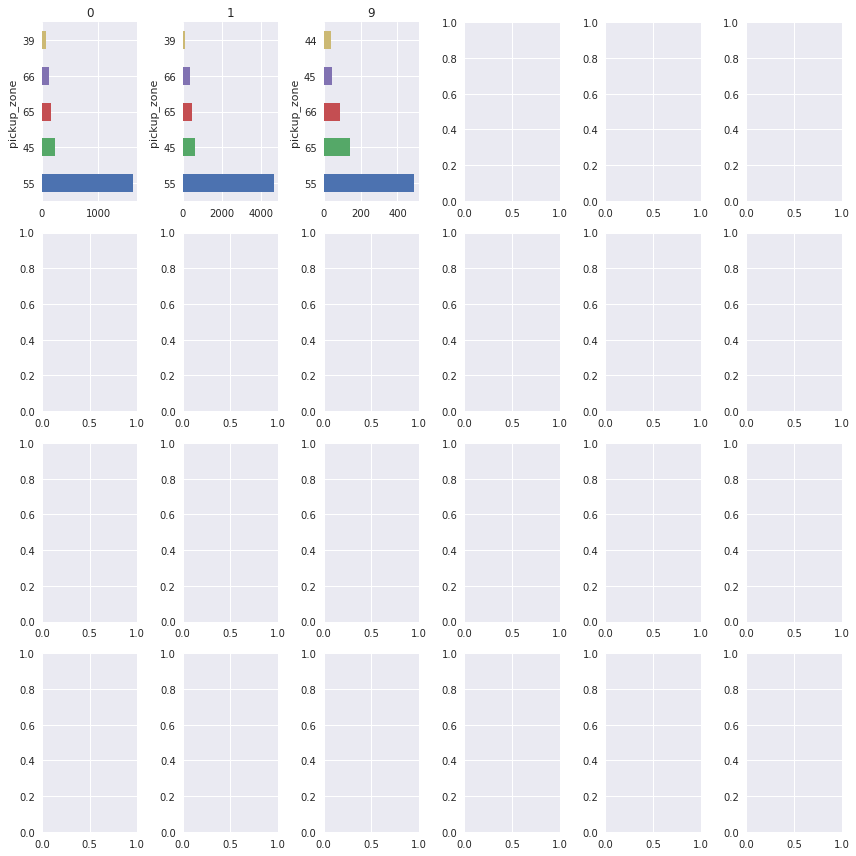

In [38]:
grouped = new_df.groupby(['pickup_zone', 'pickup_hour']).size().unstack()
grouped
COL_NUM = 6
ROW_NUM = 4
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

for i, (hour, zone) in enumerate(grouped.items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    zone_count = zone.sort_values(ascending=False)[:5] 
    zone_count.plot(kind='barh', ax=ax)
    ax.set_title(hour)

plt.tight_layout()

<h2>Groupby analysis 2</h2>
<li>Group data by the weekday and the pickup zone
<li>Draw a figure of 7 plots that show the top 5 pickup zones on each day

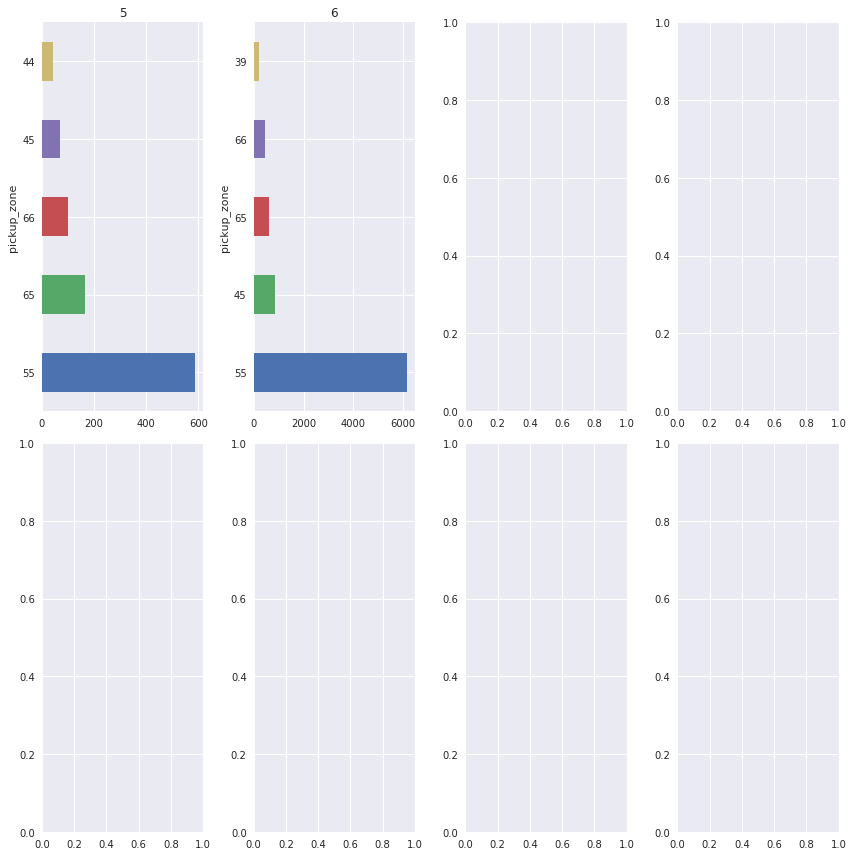

In [39]:
groups = new_df.groupby(['pickup_zone', 'day_of_week']).size().unstack()
groups
COL_NUM = 4
ROW_NUM = 2
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

for i, (day, zone) in enumerate(groups.items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    zone_count = zone.sort_values(ascending=False)[:5] 
    zone_count.plot(kind='barh', ax=ax)
    ax.set_title(day)

plt.tight_layout()

<h1>Most frequent morning pickups</h1>
<li>Identify the most frequent pickup zone between 8 am and 9 am on a weekday



In [40]:
freq = new_df[(new_df['pickup_hour'] >= 8) & (new_df['pickup_hour'] <= 9) & (new_df['day_of_week'] >=1) & (new_df['day_of_week'] <= 5)]['pickup_zone'].value_counts().index[0]
print("The most frequent pickup zone between 8 am and 9 am on a weekday is:", freq)

The most frequent pickup zone between 8 am and 9 am on a weekday is: 55


<h2>Mapping</h2>
<li>Draw a folium map using the polygon geojson object and the counts dataframe (see class example)

In [41]:
import folium

In [42]:
zip_groups = new_df.groupby("pickup_zone")
sizes = pd.DataFrame(zip_groups.size())
sizes.rename(columns={0:"size"},inplace=True)
sizes.reset_index(level=0, inplace=True)
sizes['Zone'] = sizes['pickup_zone']
sizes

,pickup_zone,size,Zone
0,23,1,23
1,24,2,24
2,26,1,26
3,34,1,34
4,35,25,35
5,36,15,36
6,37,5,37
7,39,208,39
8,44,174,44
9,45,909,45


In [43]:
m = folium.Map(location = [40.7589,-73.9851], zoom_start=12)

m.choropleth(geo_data=geo_data_json, data=sizes,
             columns=['Zone','size'],
             key_on='feature.properties.zone_id',
             fill_color='RdYlGn', fill_opacity=0.7, line_opacity=0.8,
             legend_name='Distribution of ride pickup zones')

folium.LayerControl().add_to(m)

In [44]:
m

In [45]:
geo_data_json

{'features': [{'geometry': {'coordinates': [[[-74.2635, 40.4856],
      [-74.21240999999999, 40.4856],
      [-74.21240999999999, 40.533],
      [-74.2635, 40.533],
      [-74.2635, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'highlight': {},
    'style': {'color': 'black',
     'fillColor': '#1a9850',
     'fillOpacity': 0.7,
     'opacity': 0.8,
     'weight': 1},
    'zone_id': '00'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.21240999999999, 40.4856],
      [-74.16131999999999, 40.4856],
      [-74.16131999999999, 40.533],
      [-74.21240999999999, 40.533],
      [-74.21240999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'highlight': {},
    'style': {'color': 'black',
     'fillColor': '#1a9850',
     'fillOpacity': 0.7,
     'opacity': 0.8,
     'weight': 1},
    'zone_id': '01'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.16131999999999, 40.4856],
      [-74.11023, 40.4856],
      [-74.11023, 40.533],
      [-74.1613